# Importing the Libraries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the Data

In [16]:
df=pd.read_csv('red.csv')

In [17]:
df.head(12)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# Exploratory Data Analysis

In [18]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No missing values are present in the data.

In [19]:
columns=df.columns
a=df[columns].skew().sort_values()
a

density                 0.071288
pH                      0.193683
quality                 0.217802
citric acid             0.318337
volatile acidity        0.671593
alcohol                 0.860829
fixed acidity           0.982751
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
sulphates               2.428672
residual sugar          4.540655
chlorides               5.680347
dtype: float64

Normalising the data for columns with skew values greater than 0.75.

In [20]:
a=a[a>0.75]
a

alcohol                 0.860829
fixed acidity           0.982751
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
sulphates               2.428672
residual sugar          4.540655
chlorides               5.680347
dtype: float64

In [21]:
b=a.index
df[b]=np.log(df[b])

In [22]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.001480,0.70,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710,5
1,2.054124,0.88,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,2.282382,5
2,2.054124,0.76,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,2.282382,5
3,2.415914,0.28,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,2.282382,6
4,2.001480,0.70,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710,5


In [23]:
df.skew().sort_values()

free sulfur dioxide    -0.234031
total sulfur dioxide   -0.079323
density                 0.071288
pH                      0.193683
quality                 0.217802
citric acid             0.318337
fixed acidity           0.393915
alcohol                 0.661856
volatile acidity        0.671593
sulphates               0.921867
chlorides               1.745215
residual sugar          1.806864
dtype: float64

# Visualisations

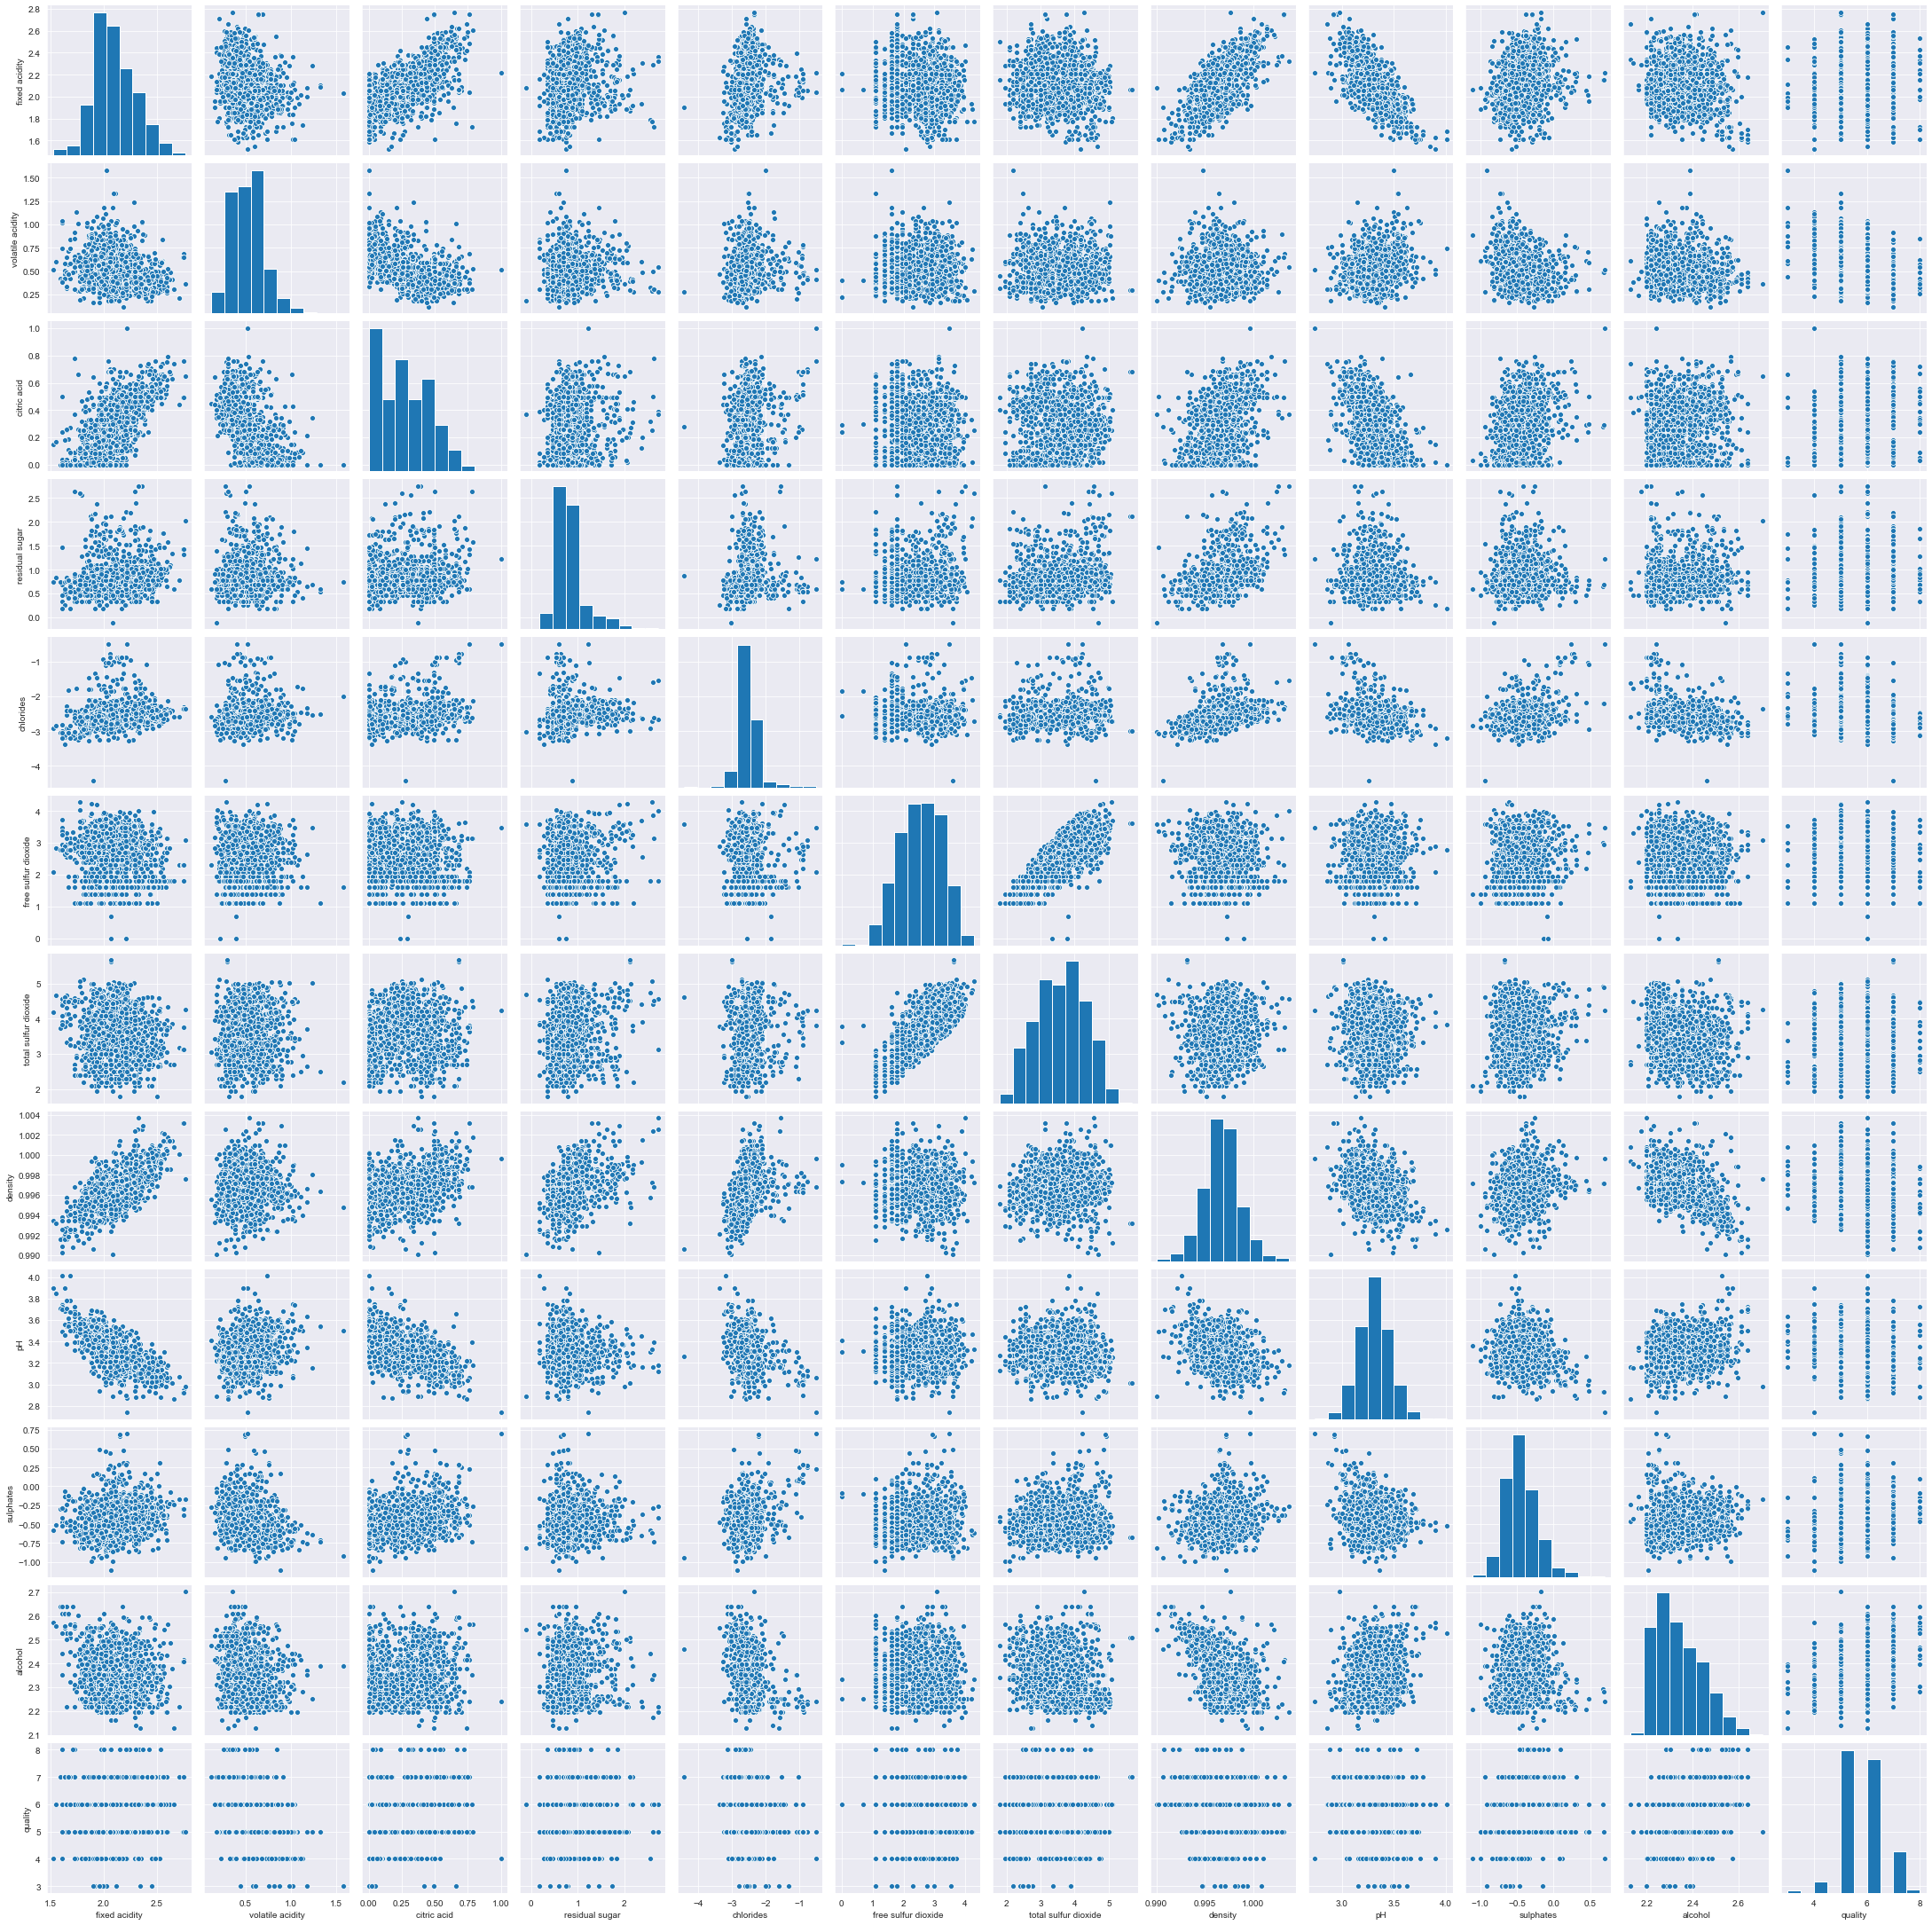

In [24]:
sns.pairplot(df)

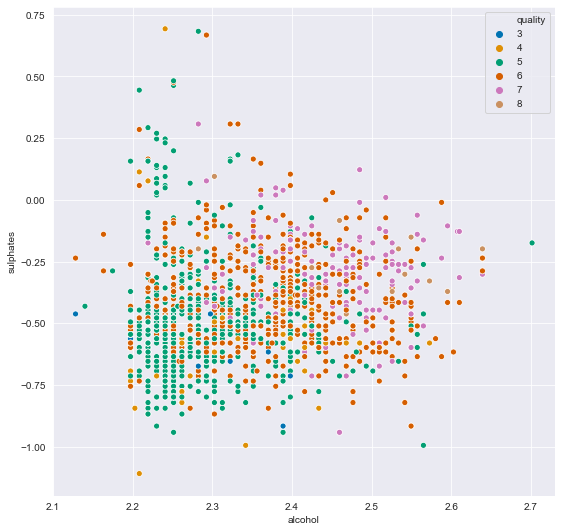

In [25]:
plt.figure(figsize=(9,9))
sns.set_style('darkgrid')
sns.scatterplot(x='alcohol',y='sulphates',data=df,hue='quality',palette='colorblind')

# Feature Engineering

Categorising the column 'quality' into three categories i.e. Bad, Average and Good.

In [28]:
reviews = []
for i in df['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
df['Reviews'] = reviews

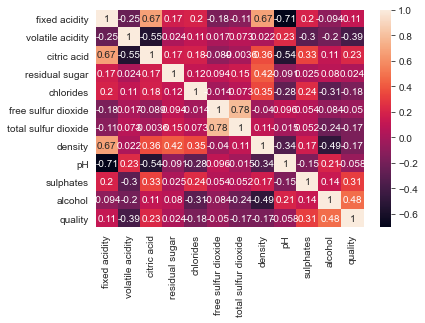

In [12]:
sns.heatmap(df.corr(),annot=True)

In [29]:
target=df.Reviews
df=df.drop(['quality','Reviews'],axis=1)

# Training the Model

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [31]:
steps=[('Scaler',StandardScaler()),('lr',LogisticRegression())]

In [32]:
pipeline=Pipeline(steps)

In [33]:
parameters={'lr__C':np.logspace(0,4,40),'lr__max_iter':[20000]}

In [34]:
cv=GridSearchCV(pipeline,parameters,cv=3)

In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(df,target,test_size=0.2)

In [36]:
cv.fit(X_train,Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('Scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lr',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
              

In [37]:
cv_pred=cv.predict(X_test)

# Predictions

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [43]:
lr_acc_score = accuracy_score(Y_test, cv_pred)
print('Accuracy Score for testing data:',lr_acc_score*100)

Accuracy Score for testing data: 96.875
